In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib
import pickle
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA

sns.set(font_scale=1, context='notebook')
matplotlib.rcParams['figure.figsize'] = 10,10
plt.rcParams['axes.facecolor'] = '#f5f5f5'

saved_filename = 'test'

# Define Functions

In [45]:
def visualize_gates(gates, images, num_test_digits=10, shuffle=True):
    '''
    Visualize num_test_digits examples of gate activations
    '''
    # Indiviual cell is height=1, width=0.4
    width = 1 * gates.shape[2] # Cell width * num of modules
    height = 0.4 * gates.shape[1] # Cell height * num of layers
    figsize = (width, height) 

    plot_num = num_test_digits * 100 + 11
    for i in range(num_test_digits):
        # To shuffle
        if shuffle:
            k = (i + np.random.randint(low=0, high=gates.shape[0]-1)) % gates.shape[0]
        else:
            k = i

        plt.figure(figsize=(5, 2))
        plt.title('Number is: '+str(labels[k]))
        sns.heatmap(gates[k,:,:])
        plt.figure(figsize=(2, 2))
        plt.imshow(images[k])


def compute_cosine_sim(gates, parameter_dict, num_test_digits, trial = 2):
    '''
    Compute cosine similarity
    '''
    gate_vectors = np.reshape(gates, (-1, parameter_dict['L']*parameter_dict['M']))
    #print(gate_vectors.shape)
    gate_vectors = np.transpose(gate_vectors)

    output = np.zeros(num_test_digits)
    for i in range(num_test_digits):
        a = gate_vectors[:, trial]
        b = gate_vectors[:, i]
        an = a/np.linalg.norm(a)
        bn = b/np.linalg.norm(b)
        output[i] = np.dot(an,bn)

    print('output', output)
    elems = np.argsort(output)
    print('Most similar elems to trial', elems[::-1])
    
    
def visualize_model(gates_reshaped, labels, model):
    '''
    Visualize the data X, with label y with the model (t-SNE or PCA)
    '''
    print(gates_reshaped.shape) # sanity check
    independent_labels = list(set(labels))
    print(independent_labels) # sanity check

    x = model.fit_transform(gates_reshaped)
    y = labels

    # Add more colors if doing something other than MNIST
    colors = ['b','g','#00FFFF','c','m','y','k','#00A4BA','r','#F4C2C2']

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    for i in (independent_labels):
        mask_i = y == i
        x_i = x[mask_i]
        ax1.scatter(x_i[:,0], x_i[:,1], s=10, c=colors[i], label='Label: '+str(i))
    plt.legend(loc='upper left');
    plt.show()


def visualize_comparison(gates_reshaped, labels, model, digits=[7,8]):
    '''
    Same as visualize model but only plots certain digits 
    '''
    mask = labels == digits[0]
    for digit in digits:
        mask_digit = labels == digit
        mask = mask | mask_digit

    gates_reshaped_masked = gates_reshaped[mask, :]
    labels_masked = labels[mask]
    
    x = model.fit_transform(gates_reshaped_masked)
    y = labels_masked

    # Add more colors if doing something other than MNIST
    colors = ['b','g','#00FFFF','c','m','y','k','#00A4BA','r','#F4C2C2']

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    for i in (digits):
        mask_i = y == i
        x_i = x[mask_i]
        ax1.scatter(x_i[:,0], x_i[:,1], s=10, c=colors[i], label='Label: '+str(i))
    plt.legend(loc='upper left');
    plt.show()

<br><br><br>
# ------------------------------------------------------------------------------------
#                               Visualize gates and images
# ------------------------------------------------------------------------------------
<br>

# Load data
<br>

In [46]:
# Load gate vector data
with open('output/' + saved_filename + '.pkl', 'rb') as f:
        input = pickle.load(f)

# Get components from data
gates = np.array(input[0])
labels = np.array(input[1])
images = np.array(input[2])
parameter_dict = input[3]

print(parameter_dict)
print(labels.shape)
print(gates.shape)

{'tensor_size': 30, 'gamma': 2, 'batch_size': 1000, 'output_file': 'test', 'learning_rate': 0.001, 'L': 5, 'M': 6, 'num_batches': 1001}
(1000,)
(1000, 5, 6)


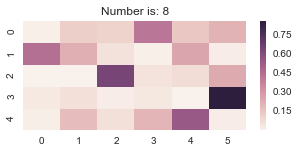

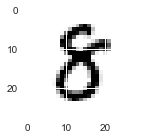

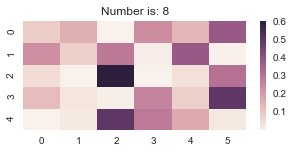

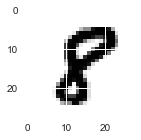

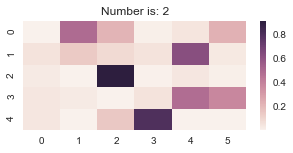

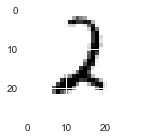

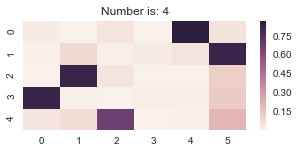

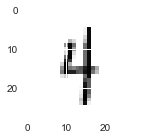

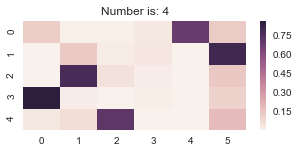

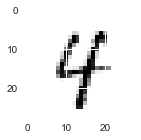

In [6]:
visualize_gates(gates, images, num_test_digits=5)

In [7]:
# Close all figures (so they don't stay open in memory)
plt.close('all')

In [8]:
compute_cosine_sim(gates, parameter_dict, num_test_digits=5, trial=2)

output [ 0.12973964  0.94492443  1.          0.16536043  0.24753829]
Most similar elems to trial [2 1 4 3 0]


# Visualizations of the gates (dim reduction)


In [9]:
# Preprocess to make gates the correct size
gates_reshaped = np.reshape(gates, [gates.shape[0], -1])

### Plot PCA

(1000, 30)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


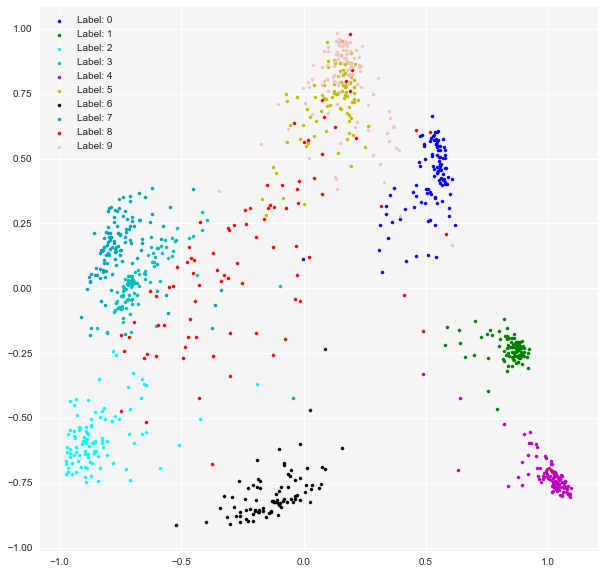

In [10]:
# Visualize PCA
visualize_model(gates_reshaped, labels, PCA())

### Plot t-SNE

(1000, 30)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.163783
[t-SNE] Iteration 25: error = 0.9788808, gradient norm = 0.0117629
[t-SNE] Iteration 50: error = 0.9729734, gradient norm = 0.0165693
[t-SNE] Iteration 75: error = 0.6104180, gradient norm = 0.0041660
[t-SNE] Iteration 100: error = 0.6183544, gradient norm = 0.0099553
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.618354
[t-SNE] Iteration 125: error = 0.5254458, gradient norm = 0.0013975
[t-SNE] Iteration 150: error = 0.5270982, gradient norm = 0.0057773
[t-SNE] Iteration 175: error = 0.5549864, gradient norm = 0.0082835
[t-SNE] Iteration 175: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 175 iterations: 0.618354


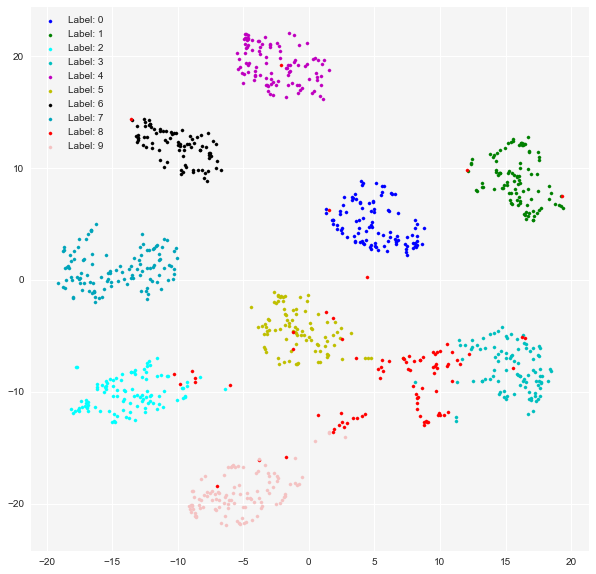

In [11]:
# Visualize t-SNE
visualize_model(gates_reshaped, labels, TSNE(verbose=100))

### Plot digit comparisons (PCA)

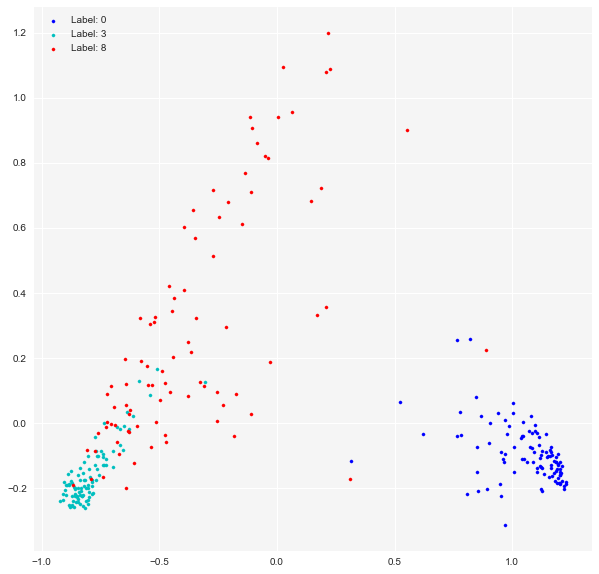

In [12]:
# Visualize the comparison between a and b (with PCA)
visualize_comparison(gates_reshaped, labels, PCA(), digits=[0,3,8])

### Plot digit comparisons (t-SNE)


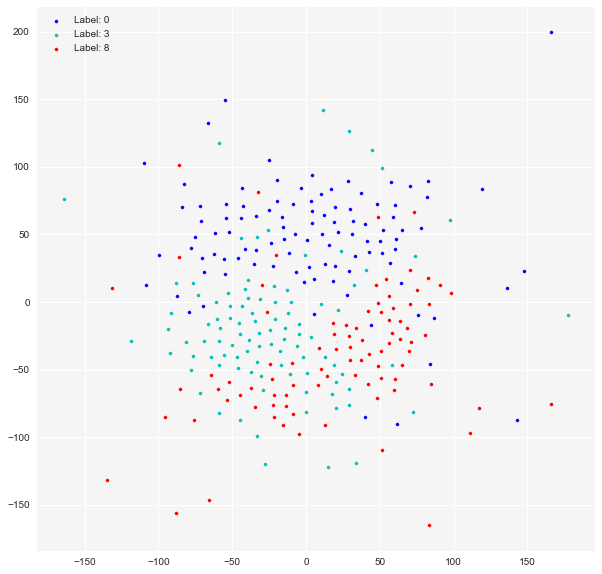

In [13]:
# Visualize the comparison between a and b (with t-SNE)
visualize_comparison(gates_reshaped, labels, TSNE(), digits=[0,3,8])

<br><br><br>
# ------------------------------------------------------------------------------------
#                      For final feature layer (pre-softmax layer)
# ------------------------------------------------------------------------------------
<br>

In [14]:
# Load gate vector data
with open('output/' saved_filename+'__feature_layer_outputs' + '.pkl', 'rb') as f:
        input = pickle.load(f)

# Get components from data
features = np.array(input[0])
labels = np.array(input[1])
images = np.array(input[2])
parameter_dict = input[3]

print(parameter_dict)
print(labels.shape)
print(features.shape)

## Visualize predictions and images


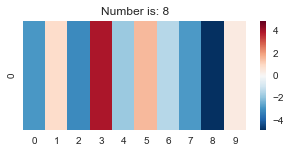

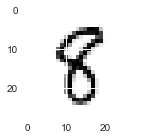

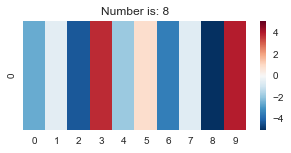

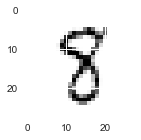

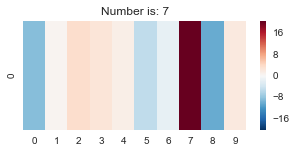

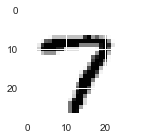

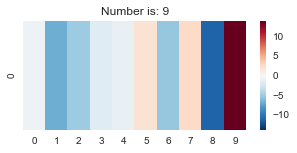

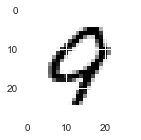

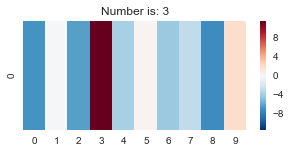

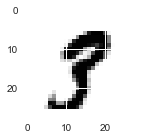

In [17]:
visualize_gates(features, images, num_test_digits=5)

In [18]:
# Close all figures (so they don't stay open in memory)
plt.close('all')

In [20]:
features_reshaped = np.reshape(features, [features.shape[0], -1])
print(features.shape)
print(features_reshaped.shape)
print(np.argmax(features, axis=0))

(1000, 1, 10)
(1000, 10)
[[874 492 487 917 623 854 258 167 884 227]]


### Plot PCA

(1000, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


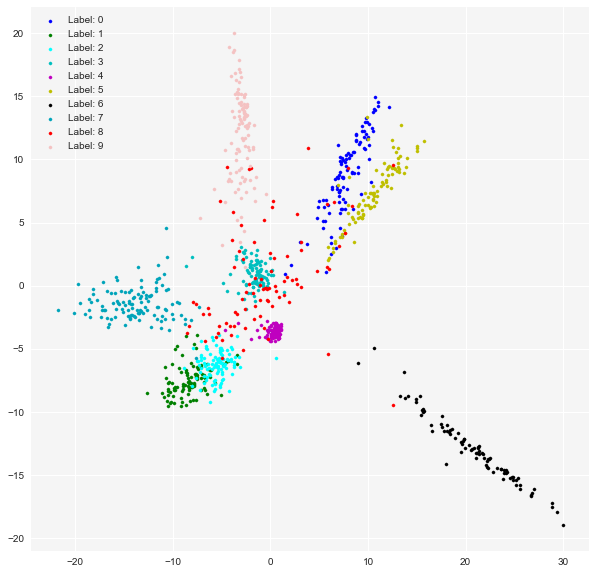

In [21]:
visualize_model(features_reshaped, labels, PCA())

### Plot t-SNE

(1000, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.763613
[t-SNE] Iteration 25: error = 0.8406898, gradient norm = 0.0068168
[t-SNE] Iteration 50: error = 0.7546166, gradient norm = 0.0091886
[t-SNE] Iteration 75: error = 0.4647165, gradient norm = 0.0014811
[t-SNE] Iteration 100: error = 0.4373536, gradient norm = 0.0037331
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.437354
[t-SNE] Iteration 125: error = 0.3837991, gradient norm = 0.0007539
[t-SNE] Iteration 125: gradient norm 0.000754. Finished.
[t-SNE] Error after 125 iterations: 0.437354


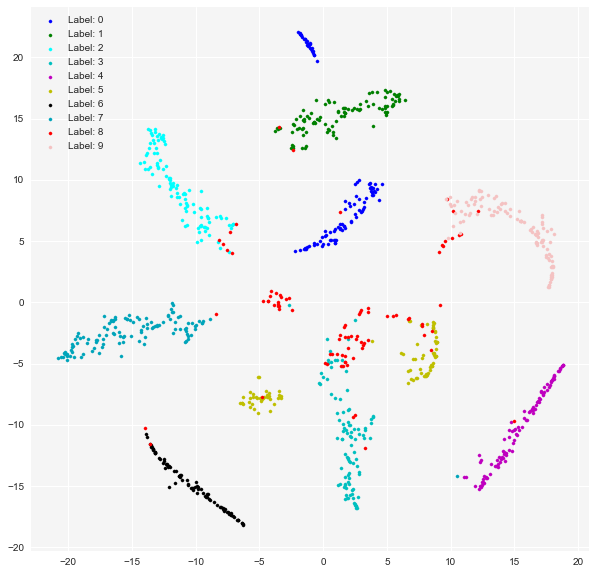

In [22]:
visualize_model(features_reshaped, labels, TSNE(verbose=100))

### Plot digit comparisons (PCA)

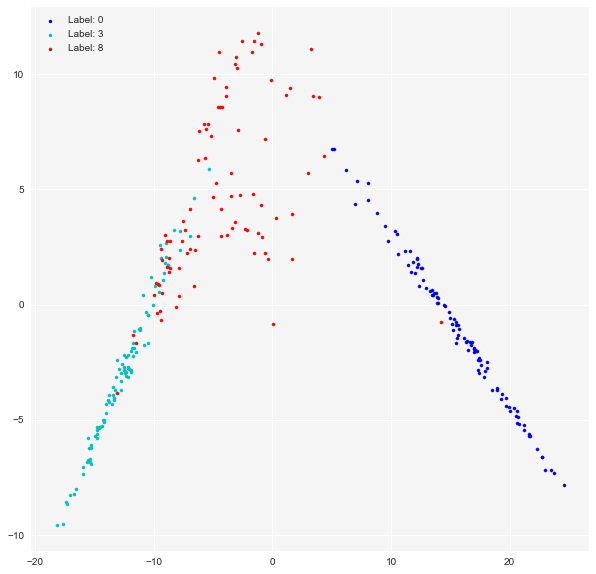

In [23]:
# Visualize the comparison between a and b (with PCA)
visualize_comparison(features_reshaped, labels, PCA(), digits=[0,3,8])

### Plot digit comparisons (t-SNE)

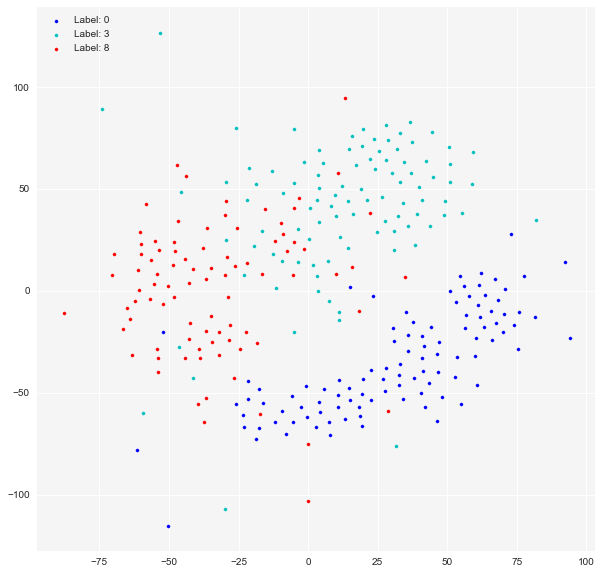

In [24]:
# Visualize the comparison between a and b (with t-SNE)
visualize_comparison(features_reshaped, labels, TSNE(), digits=[0,3,8])

<br><br><br>
# ------------------------------------------------------------------------------------
#                               For Softmax outputs of digits
# ------------------------------------------------------------------------------------
<br>

## Visualize Softmax Predictions

In [26]:
# Load gate vector data
with open('output/' saved_filename+'__softmax_outputs' + '.pkl', 'rb') as f:
        input = pickle.load(f)

# Get components from data
preds = np.array(input[0])
labels = np.array(input[1])
images = np.array(input[2])
parameter_dict = input[3]

print(parameter_dict)
print(labels.shape)
print(preds.shape)

## Visualize predictions and images

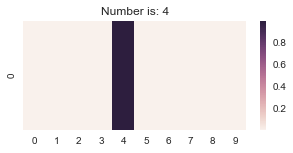

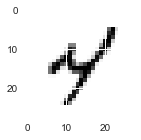

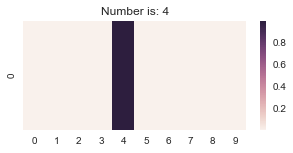

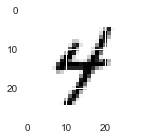

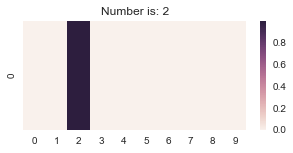

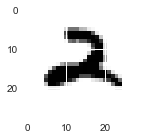

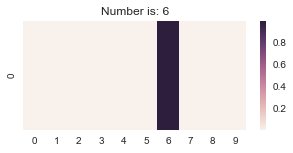

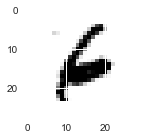

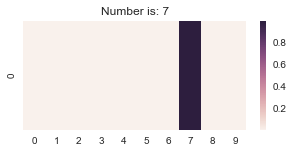

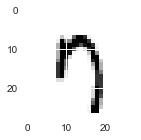

In [36]:
visualize_gates(preds, images, num_test_digits=5)

In [37]:
# Close all figures (so they don't stay open in memory)
plt.close('all')

In [38]:
preds_reshaped = np.reshape(preds, [preds.shape[0], -1])
print(preds.shape)
print(preds_reshaped.shape)
print(np.argmax(preds, axis=0))

(1000, 1, 10)
(1000, 10)
[[874 290 392 387 623 236  22  46 259 572]]


### Plot PCA

(1000, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


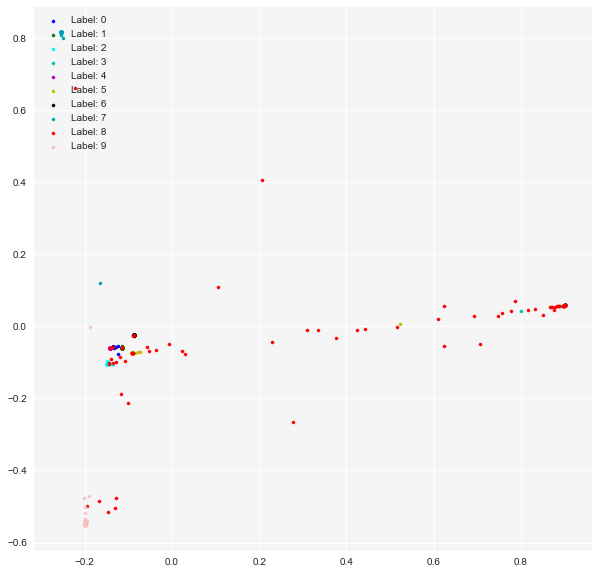

In [39]:
visualize_model(preds_reshaped, labels, PCA())

### Plot t-SNE

(1000, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.000001
[t-SNE] Iteration 25: error = 0.7670415, gradient norm = 0.0055874
[t-SNE] Iteration 50: error = 0.6479606, gradient norm = 0.0056228
[t-SNE] Iteration 75: error = 0.3451374, gradient norm = 0.0028990
[t-SNE] Iteration 100: error = 0.3090804, gradient norm = 0.0026291
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.309080
[t-SNE] Iteration 125: error = 0.2411471, gradient norm = 0.0025623
[t-SNE] Iteration 150: error = 0.2262497, gradient norm = 0.0023147
[t-SNE] Iteration 175: error = 0.2259803, gradient norm = 0.0025221
[t-SNE] Iteration 200: error = 0.2273420, gradient norm = 0.0024145
[t-SNE] Iteration 225: error = 0.2291773, gradient norm = 0.0023961
[t-SNE] Iteration 225: did not make any progress during the last 30 episodes. Finished.
[t-SNE]

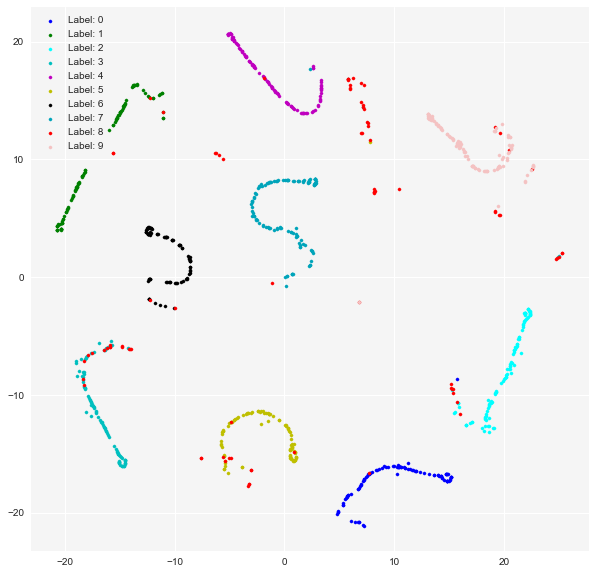

In [40]:
visualize_model(preds_reshaped, labels, TSNE(verbose=100))

### Plot digit comparisons (PCA)

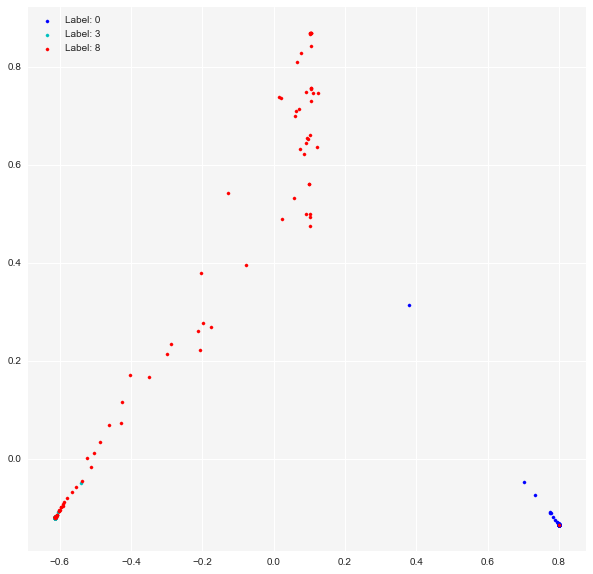

In [41]:
# Visualize the comparison between a and b (with PCA)
visualize_comparison(preds_reshaped, labels, PCA(), digits=[0,3,8])

### Plot digit comparisons (t-SNE)

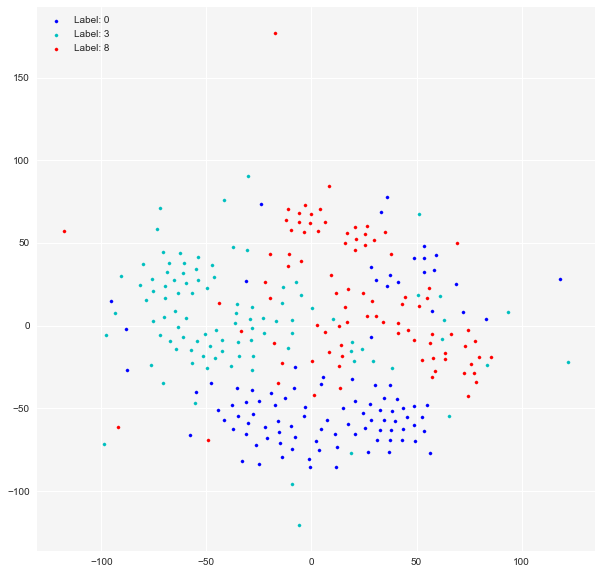

In [42]:
# Visualize the comparison between a and b (with t-SNE)
visualize_comparison(preds_reshaped, labels, TSNE(), digits=[0,3,8])